<a href="https://colab.research.google.com/github/jpriyam/SHALA2020/blob/master/ML_L1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [3]:
attrition_data.head()
#attrition_data.MaritalStatus.value_counts()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [4]:
attrition_data.Department.value_counts()
attrition_data.BusinessTravel.value_counts()


Travel_Rarely        729
Travel_Frequently    197
Non-Travel           102
Name: BusinessTravel, dtype: int64

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [0]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import classification_report,precision_recall_curve

In [6]:
attrition_new =pd.get_dummies(data=attrition_data, columns=['BusinessTravel','Department', 'EducationField','JobRole','MaritalStatus'])
attrition_new.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,Female,94,3,2,4,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,Male,61,2,2,2,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,Male,92,2,1,3,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,Female,56,3,1,3,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,Male,40,3,1,2,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [0]:
attrition_new['Gender'] = attrition_new['Gender'].map(dict(zip(['Male','Female'],[0,1])))
attrition_new['OverTime'] = attrition_new['OverTime'].map(dict(zip(['No','Yes'],[0,1])))


In [8]:
attrition_new.dropna()
attrition_new.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,1,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,0,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,0,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,1,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,0,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [9]:
attrition_new.Gender.value_counts()

0    597
1    431
Name: Gender, dtype: int64

In [0]:
#NORMALIZE
numeric_col = attrition_new[["DailyRate", "MonthlyIncome","MonthlyRate"]]
n_DailyRate =((numeric_col['DailyRate']/numeric_col['DailyRate'].max())*100)
n_MonthlyIncome =((numeric_col['MonthlyIncome']/numeric_col['MonthlyIncome'].max())*100)
n_MonthlyRate =((numeric_col['MonthlyRate']/numeric_col['MonthlyRate'].max())*100)

In [11]:
attrition_new.drop(['DailyRate','MonthlyIncome','MonthlyRate','EmployeeNumber','EmployeeCount','ID'],axis=1)

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,2,1,94,3,2,4,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,8,1,3,0,61,2,2,2,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,2,2,4,0,92,2,1,3,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,3,4,4,1,56,3,1,3,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,2,1,1,0,40,3,1,2,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,0,1,2,1,1,90,3,1,1,2,0,22,4,4,1,5,3,4,3,2,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1024,47,0,2,4,1,1,82,3,4,3,3,0,19,3,2,2,26,2,4,20,17,5,6,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1025,24,0,4,1,4,1,42,3,2,3,1,1,12,3,3,2,5,3,3,5,4,0,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1026,32,0,7,5,4,0,97,3,2,4,4,0,12,3,3,1,7,3,2,4,3,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [0]:
attrition_new ['n_DailyRate']=n_DailyRate
attrition_new ['n_MonthlyIncome']=n_MonthlyIncome
attrition_new ['n_MonthlyRate']=n_MonthlyRate

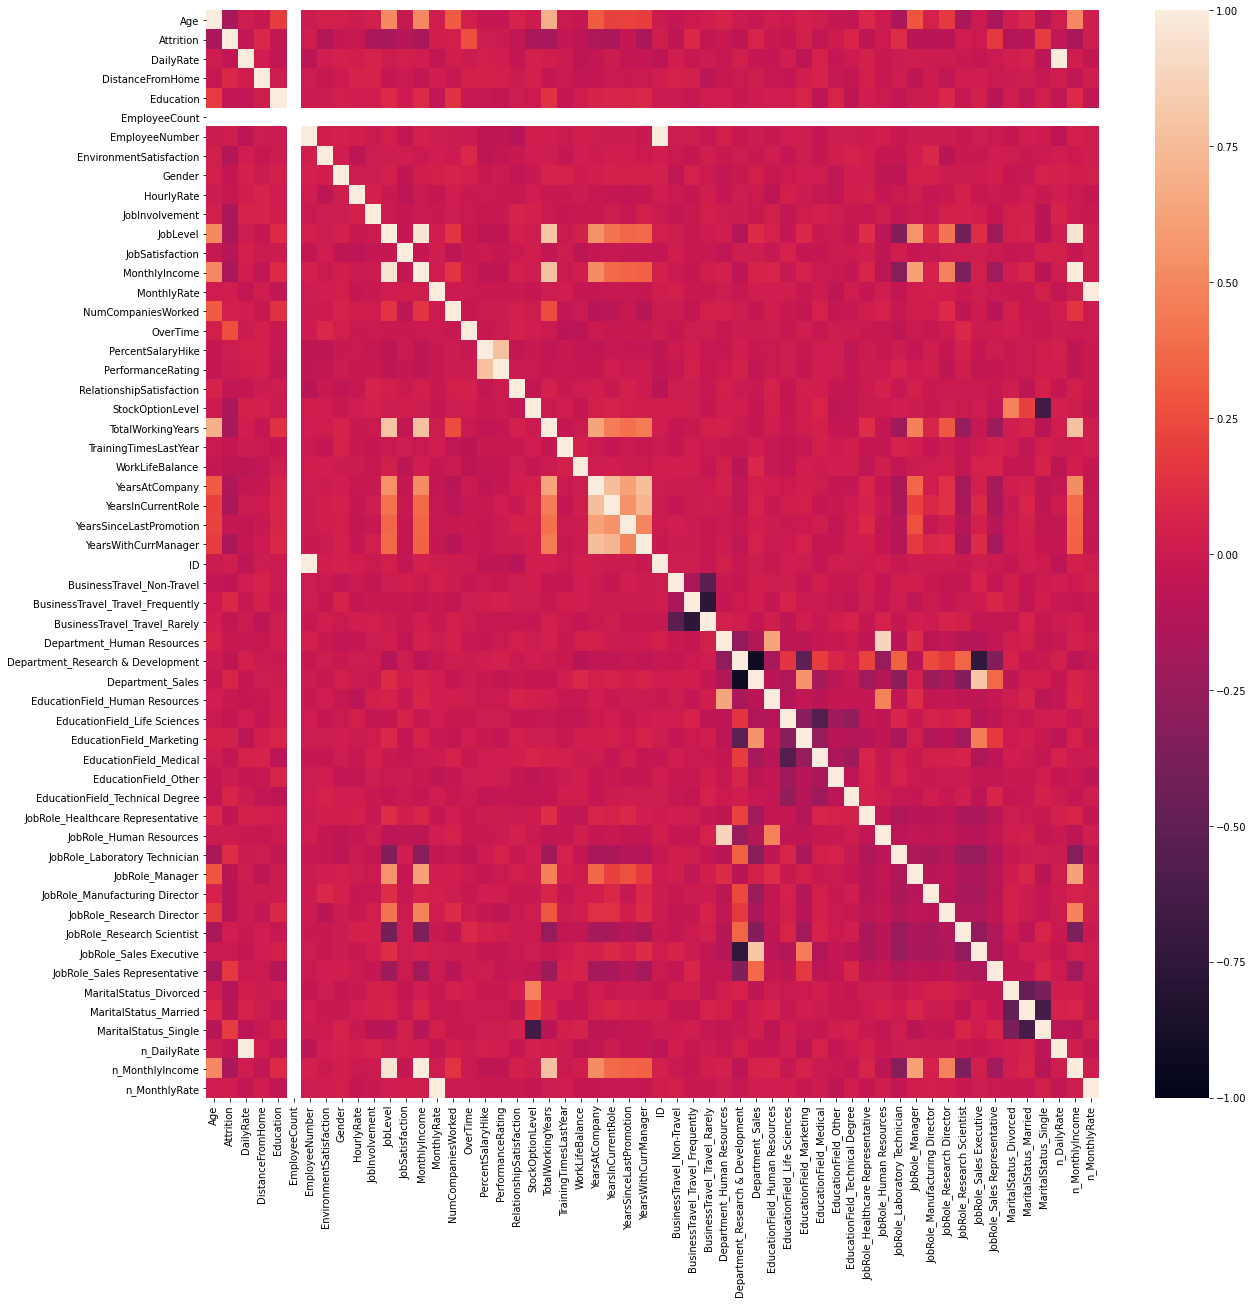

In [13]:
plt.figure(figsize=(20,20))
mask = np.zeros_like(attrition_new.corr(), dtype=np.bool)
sns.heatmap(attrition_new.corr(), 
            vmin = -1 
            )

In [0]:
X = attrition_new.drop(['Attrition'], axis = 1)
y = attrition_new['Attrition']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

**Random** **Forest**

---



In [0]:
rfr = RandomForestClassifier(n_estimators=2,
                            random_state=11134,
                            max_features=4)

In [0]:
rfr.fit(X_train, y_train)
y_pred=rfr.predict(X_test)

In [18]:
print('The training error is {0:.2f}'.format(mean_absolute_error(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mean_absolute_error(y_test, rfr.predict(X_test))))

The training error is 0.07
The testing error is 0.17


In [19]:
y_pred = rfr.predict(X_train)
print('Accuracy Train set: ',metrics.accuracy_score(y_train, y_pred))

y_pred = rfr.predict(X_test)
print('Accuracy Test set: ',metrics.accuracy_score(y_test, y_pred))


Accuracy Train set:  0.9346314325452016
Accuracy Test set:  0.8284789644012945


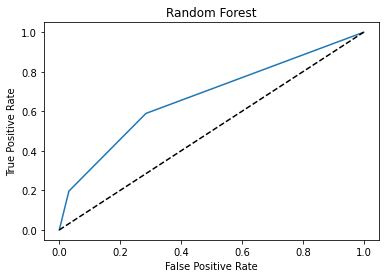

In [20]:
from sklearn.metrics import roc_curve  
probs = rfr.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest')
# show the plot
plt.show()

In [21]:
lr_probs = rfr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
rfr_precision, rfr_recall, _ = precision_recall_curve(y_test, lr_probs)
print(rfr_precision)
print(rfr_recall)

[0.18122977 0.31428571 0.57894737 1.        ]
[1.         0.58928571 0.19642857 0.        ]


In [22]:
print('The training results are :')
print(classification_report(y_train, rfr.predict(X_train)))
print('The testing results are :')
print(classification_report(y_test, rfr.predict(X_test)))

The training results are :
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       603
           1       0.96      0.62      0.75       116

    accuracy                           0.93       719
   macro avg       0.95      0.81      0.86       719
weighted avg       0.94      0.93      0.93       719

The testing results are :
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       253
           1       0.58      0.20      0.29        56

    accuracy                           0.83       309
   macro avg       0.71      0.58      0.60       309
weighted avg       0.80      0.83      0.79       309



DECISION TREE

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(
                            random_state=8811,
                            )
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8811, splitter='best')

In [0]:
y_pred = tree.predict(X_test)

In [26]:
y_pred = tree.predict(X_train)
print('Accuracy Train set: ',metrics.accuracy_score(y_train, y_pred))

y_pred = tree.predict(X_test)
print('Accuracy Test set: ',metrics.accuracy_score(y_test, y_pred))

Accuracy Train set:  1.0
Accuracy Test set:  0.7993527508090615


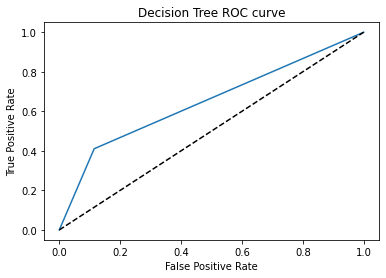

In [24]:
from sklearn.metrics import roc_curve  
probs = tree.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
# show the plot
plt.show()

In [28]:
lr_probs = tree.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
tree_precision, tree_recall, _ = precision_recall_curve(y_test, lr_probs)
print(tree_precision)
print(tree_recall)

[0.18122977 0.44230769 1.        ]
[1.         0.41071429 0.        ]


**XGBClassifier**

In [27]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(X_train, y_train)

print('The training results are :')
print(classification_report(y_train, xgb_clf.predict(X_train)))
print('The testing results are :')
print(classification_report(y_test, xgb_clf.predict(X_test)))

The training results are :
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       603
           1       0.92      0.31      0.46       116

    accuracy                           0.88       719
   macro avg       0.90      0.65      0.70       719
weighted avg       0.89      0.88      0.86       719

The testing results are :
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       253
           1       0.72      0.23      0.35        56

    accuracy                           0.84       309
   macro avg       0.79      0.61      0.63       309
weighted avg       0.83      0.84      0.81       309



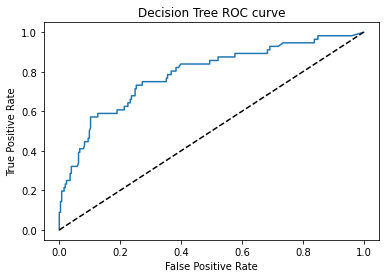

In [29]:
probs = xgb_clf.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
# show the plot
plt.show()

**DECISION TREE CLASSIFIER WITH GRIDSEARCH**

In [0]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

In [31]:
grid_search.fit(X_train, y_train)
print('The training results are :')
print(classification_report(y_train, grid_search.predict(X_train)))
print('The testing results are :')
print(classification_report(y_test, grid_search.predict(X_test)))

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The training results are :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       603
           1       0.00      0.00      0.00       116

    accuracy                           0.84       719
   macro avg       0.42      0.50      0.46       719
weighted avg       0.70      0.84      0.77       719

The testing results are :
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       253
           1       0.00      0.00      0.00        56

    accuracy                           0.82       309
   macro avg       0.41      0.50      0.45       309
weighted avg       0.67      0.82      0.74       309



[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    8.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


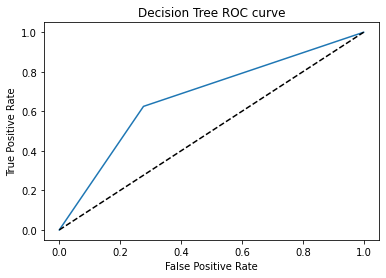

In [32]:
probs = grid_search.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
# show the plot
plt.show()